# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Reading dataset

In [2]:
df = pd.read_csv('data_banknote_authentication.txt', sep=',', header=None,
                  names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [7]:
x0, x1 = df['class'].value_counts()
print('{} records belongs to class 0'.format(x0))
print('{} records belongs to class 1'.format(x1))

762 records belongs to class 0
610 records belongs to class 1


# Reading data from text file

In [8]:
data = np.genfromtxt('data_banknote_authentication.txt', delimiter=',')

## slicing features and labels

In [9]:
X,y = data[:,:4], data[:,-1]
print(X.shape, y.shape)

(1372, 4) (1372,)


## splitting dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
X_train, X_test = X_train.T, X_test.T
print(X_train.shape, X_test.shape)

(4, 1097) (4, 275)


In [12]:
y_train, y_test = y_train.reshape(1, y_train.shape[0]), y_test.reshape(1, y_test.shape[0])
print(y_train.shape, y_test.shape)

(1, 1097) (1, 275)


# 1) Defining Structure

Defining structure of neural network, i.e; number of input units and no.of hidden unitss.
Input units are nothing but number of features that are available (4).
We can make hidden layer to 4 units and a single layer output for binary classification.

<img src='network.png' width='500' height='500'>

In [13]:
def structure(X,Y):
    input_unit = X.shape[0] #4
    hidden_unit = 4
    output_unit = Y.shape[0] #4
    
    return (input_unit, hidden_unit, output_unit)

input_unit, hidden_unit, output_unit = structure(X_train, y_train)

# 2) Parameters Initialization

Here weights and bias matrices are to be initilaized. Weights are choosen randomly and bias is set to zero initially.

In [14]:
def parameters_init(input_unit, hidden_unit, output_unit):
    
    np.random.seed(2)
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit,1))
    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    
    return parameters

# 3) Forward Propagation

We need to compute the activation function for each layer, given the set of input features(X). For hidden layer, we can make use of any activation function. In this we will use numpy's inbuilt **tanh** function. For output layer **sigmoid** function is used.

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    temp = {'Z1':Z1, 'A1':A1, 'Z2':Z2, 'A2':A2}
    return A2, temp 

# 4) Cross-entropy cost

Next, we need to compute cross-entropy cost. Using A2 we can compute cross-entropy cost using following formula.

<img src='cost.png'>

In [16]:
def cross_entropy_cost(A2, Y, parameters):
    
    m = Y.shape[1] #no.of training examples
    logs = np.multiply(np.log(A2),Y) + np.multiply((1-Y), np.log(1-A2))
    cost = -np.sum(logs)/m
    cost = float(np.squeeze(cost))
    
    return cost

# 5) Backward Propagation

In this step, we need to calculate the gradient w.r.to different parameters.
<img src='bck.png'>

In [17]:
def backward_propagation(parameters, temp, X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    A1 = temp['A1']
    W2 = parameters['W2']
    A2 = temp['A2']

    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    grads = {'dW1':dW1, 'dW2':dW2, 'db1':db1, 'db2':db2}
    
    return grads

# 6) Updating Parameters

We use Gradient Descent algorithm to update the parameters.
<img src='gd.png' width='350' height='350'>

𝛼 is the learning rate and 𝜃 is the parameter.

In [18]:
def gradient_descent(parameters, grads, learning_rate=0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
    return parameters

# 7) Neural Network Model

In this final step we put all functions together to build a neural network model with a single hidden layer.

In [19]:
def neural_network_model(X,Y, hidden_unit, num_iterations=1000):
    np.random.seed(3)
    input_unit = structure(X,Y)[0]
    output_unit = structure(X,Y)[2]

    parameters = parameters_init(input_unit, hidden_unit, output_unit)

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    loss = []
    for i in range(0, num_iterations):
        A2,temp = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, temp, X, Y)
        parameters = gradient_descent(parameters, grads)
        loss.append(cost)
        if i%5==0:
          print('cost after {} iterations is {}'.format(i, cost))

    return parameters, loss

In [20]:
parameters, loss = neural_network_model(X_train, y_train, 4, 1000)

cost after 0 iterations is 0.692974818256008
cost after 5 iterations is 0.6926648536671564
cost after 10 iterations is 0.6923506007257978
cost after 15 iterations is 0.6920278241523767
cost after 20 iterations is 0.6916920458848873
cost after 25 iterations is 0.6913384704152844
cost after 30 iterations is 0.6909619193114926
cost after 35 iterations is 0.6905567783249688
cost after 40 iterations is 0.6901169612153037
cost after 45 iterations is 0.6896358948529898
cost after 50 iterations is 0.6891065300308953
cost after 55 iterations is 0.6885213814529922
cost after 60 iterations is 0.6878725983665469
cost after 65 iterations is 0.6871520642219461
cost after 70 iterations is 0.6863515198266376
cost after 75 iterations is 0.6854627003038677
cost after 80 iterations is 0.6844774726883398
cost after 85 iterations is 0.683387959237621
cost after 90 iterations is 0.6821866323716287
cost after 95 iterations is 0.6808663708916239
cost after 100 iterations is 0.6794204733120174
cost after 105 i

cost after 975 iterations is 0.11690055990054617
cost after 980 iterations is 0.11616957013589876
cost after 985 iterations is 0.11544743268701224
cost after 990 iterations is 0.11473399811011571
cost after 995 iterations is 0.11402912026359288


In [21]:
accuracy = 1 - np.array(loss)
#accuracy

In [22]:
#these are the final parameters
print('Weights and bias for the activation of hidden layer'+'\n')
print('<-----W1----->')
print(parameters['W1'])
print(' ')
print('<-----b1----->')
print(parameters['b1'])

Weights and bias for the activation of hidden layer

<-----W1----->
[[ 0.06521107  0.06642471 -0.00685537  0.01800601]
 [-0.56387281 -0.30989762 -0.34719833 -0.09989109]
 [-0.45605825 -0.23006511 -0.24961856 -0.07175504]
 [-0.47052236 -0.24868128 -0.26897584 -0.08918061]]
 
<-----b1----->
[[-0.00852729]
 [ 0.29754159]
 [ 0.1833203 ]
 [ 0.20013005]]


In [23]:
print('Weights and bias for the activation of output layer'+'\n')
print('<-----W2----->')
print(parameters['W2'])
print(' ')
print('<-----b2----->')
print(parameters['b2'])

Weights and bias for the activation of output layer

<-----W2----->
[[-0.10448563  1.25174565  0.86289524  0.92569912]]
 
<-----b2----->
[[0.0798439]]


# 8) Prediction

By using learned parameters, we can predict the class for each example by forward propagation.

In [24]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [25]:
predictions_train = prediction(parameters, X_train)
predictions_test = prediction(parameters, X_test)

# 9) Metrics

To find out the metrics that are useful to know the accuracy of the model and model's performance.

In [26]:
def accuracy_met(actual, predicted):
        correct = 0
        for i in range(len(actual)):
                if actual[i] == predicted[i]:
                        correct += 1
        return correct / float(len(actual)) * 100.0

In [27]:
accuracy_met(y_test.flatten(), predictions_test.flatten())

96.36363636363636

In [28]:
accuracy_met(y_train.flatten(), predictions_train.flatten())

97.90337283500456

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test.flatten(), predictions_test.flatten()).ravel()

print('False Positives: {}'.format(fp))
print('False Negetives: {}'.format(fn))
print('True Positives: {}'.format(tp))
print('True Negetives: {}'.format(tn))

False Positives: 2
False Negetives: 8
True Positives: 119
True Negetives: 146


In [30]:
from sklearn.metrics import classification_report

print('-'*10+'Test classification report'+'-'*10+'\n')
print(classification_report(predictions_test.flatten(), y_test.flatten()))

----------Test classification report----------

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       154
         1.0       0.94      0.98      0.96       121

    accuracy                           0.96       275
   macro avg       0.96      0.97      0.96       275
weighted avg       0.96      0.96      0.96       275



In [31]:
print('-'*10+'Train classification report'+'-'*10+'\n')
print(classification_report(predictions_train.flatten(), y_train.flatten()))

----------Train classification report----------

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       621
         1.0       0.97      0.98      0.98       476

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



# 10) Visualizing our model

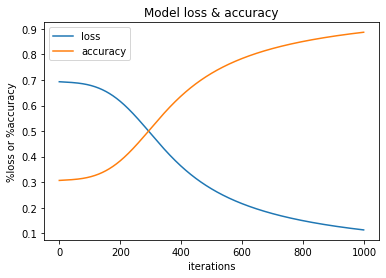

In [32]:
plt.plot(loss)
plt.plot(accuracy)
plt.title('Model loss & accuracy')
plt.xlabel('iterations')
plt.ylabel('%loss or %accuracy')
plt.legend(['loss', 'accuracy'])

# Using Logistic Regression

In [33]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

# normalizing our data

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## splitting data into train and test  

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Using Logistic Regression from scikit-learn

Initializing LogisticRegression and use fit method to fit train data and predict method on testing data for prediction.

In [36]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [37]:
lg = lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

## Metrics for model evaluation

In [38]:
lg.score(X_train, y_train)

0.9817684594348223

In [39]:
from sklearn.metrics import accuracy_score
print('Test accuracy of the data is {}'.format(accuracy_score(y_pred, y_test)))

Test accuracy of the data is 0.9781818181818182


In [40]:
print('Train accuracy of the data is {}'.format(accuracy_score(y_pred_train, y_train)))

Train accuracy of the data is 0.9817684594348223


In [41]:
print('-'*10+'Test classification report'+'-'*10+'\n')
print(classification_report(y_pred, y_test))

----------Test classification report----------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      0.97      0.98       129

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [42]:
print('-'*10+'Train classification report'+'-'*10+'\n')
print(classification_report(y_pred_train, y_train))

----------Train classification report----------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       596
           1       1.00      0.96      0.98       501

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



# Using Keras

In [43]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packag

## splitting train data for training and validation purpose

In [44]:
# Validation data 

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.2)

## converting train, test and validation labels to categorical array representation

In [45]:
from keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=2)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

## building ANN model with one hidden layer

Activation function for hidden layer is taken as **relu** function and for output layer **sigmoid** function is taken.

In [46]:
model = Sequential()

model.add(Dense(4, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


## compiling the model 

model is compilied by using attributes like categorical_cross entropy for loss, Stochastic gradient descent as optimizer and accuracy for metrics.

In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

## Training model

In [49]:
history = model.fit(X_train, y_train,
                   batch_size=128, epochs=1000,
                   validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 877 samples, validate on 220 samples
Epoch 1/1000
877/877 [==============================] - 0s 168us/step - loss: 1.1653 - accuracy: 0.1984 - val_loss: 1.2771 - val_accuracy: 0.1773
Epoch 2/1000
877/877 [==============================] - 0s 23us/step - loss: 1.1320 - accuracy: 0.1973 - val_loss: 1.2365 - val_accuracy: 0.1773
Epoch 3/1000
877/877 [==============================] - 0s 19us/step - loss: 1.1019 - accuracy: 0.1973 - val_loss: 1.1994 - val_accuracy: 0.1773
Epoch 4/1000
877/877 [==============================] - 0s 20us/step - loss: 1.0744 - accuracy: 0.1961 - val_loss: 1.1651 - val_accuracy: 0.1818
Epoch 5/1000
877/877 [==============================] - 0s 22us/step - loss: 1.0491 - accuracy: 0.1961 - val_loss: 1.1336 - val_accuracy: 0.1727
Epoch 6/1000
877/877 [==============================] - 0s 20us/step - loss: 1.0259 - accuracy: 0.1938 - val_loss: 1.1048 - val_accur

877/877 [==============================] - 0s 25us/step - loss: 0.6911 - accuracy: 0.5633 - val_loss: 0.6989 - val_accuracy: 0.4955
Epoch 54/1000
877/877 [==============================] - 0s 18us/step - loss: 0.6887 - accuracy: 0.5656 - val_loss: 0.6964 - val_accuracy: 0.4955
Epoch 55/1000
877/877 [==============================] - 0s 19us/step - loss: 0.6865 - accuracy: 0.5656 - val_loss: 0.6940 - val_accuracy: 0.4909
Epoch 56/1000
877/877 [==============================] - 0s 19us/step - loss: 0.6843 - accuracy: 0.5667 - val_loss: 0.6916 - val_accuracy: 0.4864
Epoch 57/1000
877/877 [==============================] - 0s 24us/step - loss: 0.6822 - accuracy: 0.5667 - val_loss: 0.6893 - val_accuracy: 0.4909
Epoch 58/1000
877/877 [==============================] - 0s 16us/step - loss: 0.6801 - accuracy: 0.5667 - val_loss: 0.6871 - val_accuracy: 0.4909
Epoch 59/1000
877/877 [==============================] - 0s 18us/step - loss: 0.6781 - accuracy: 0.5667 - val_loss: 0.6850 - val_accuracy:

877/877 [==============================] - 0s 19us/step - loss: 0.5963 - accuracy: 0.7389 - val_loss: 0.6014 - val_accuracy: 0.7864
Epoch 110/1000
877/877 [==============================] - 0s 19us/step - loss: 0.5947 - accuracy: 0.7400 - val_loss: 0.5997 - val_accuracy: 0.7864
Epoch 111/1000
877/877 [==============================] - 0s 22us/step - loss: 0.5930 - accuracy: 0.7412 - val_loss: 0.5979 - val_accuracy: 0.7864
Epoch 112/1000
877/877 [==============================] - 0s 20us/step - loss: 0.5914 - accuracy: 0.7423 - val_loss: 0.5962 - val_accuracy: 0.7864
Epoch 113/1000
877/877 [==============================] - 0s 19us/step - loss: 0.5897 - accuracy: 0.7434 - val_loss: 0.5944 - val_accuracy: 0.7864
Epoch 114/1000
877/877 [==============================] - 0s 19us/step - loss: 0.5880 - accuracy: 0.7434 - val_loss: 0.5927 - val_accuracy: 0.7864
Epoch 115/1000
877/877 [==============================] - 0s 65us/step - loss: 0.5864 - accuracy: 0.7434 - val_loss: 0.5909 - val_acc

877/877 [==============================] - 0s 23us/step - loss: 0.4989 - accuracy: 0.7708 - val_loss: 0.4949 - val_accuracy: 0.8409
Epoch 165/1000
877/877 [==============================] - 0s 24us/step - loss: 0.4971 - accuracy: 0.7731 - val_loss: 0.4928 - val_accuracy: 0.8409
Epoch 166/1000
877/877 [==============================] - 0s 24us/step - loss: 0.4952 - accuracy: 0.7765 - val_loss: 0.4907 - val_accuracy: 0.8409
Epoch 167/1000
877/877 [==============================] - 0s 30us/step - loss: 0.4934 - accuracy: 0.7765 - val_loss: 0.4885 - val_accuracy: 0.8364
Epoch 168/1000
877/877 [==============================] - 0s 20us/step - loss: 0.4915 - accuracy: 0.7754 - val_loss: 0.4864 - val_accuracy: 0.8364
Epoch 169/1000
877/877 [==============================] - 0s 20us/step - loss: 0.4896 - accuracy: 0.7754 - val_loss: 0.4843 - val_accuracy: 0.8409
Epoch 170/1000
877/877 [==============================] - 0s 18us/step - loss: 0.4878 - accuracy: 0.7754 - val_loss: 0.4821 - val_acc

Epoch 220/1000
877/877 [==============================] - 0s 23us/step - loss: 0.3952 - accuracy: 0.8426 - val_loss: 0.3782 - val_accuracy: 0.8818
Epoch 221/1000
877/877 [==============================] - 0s 19us/step - loss: 0.3934 - accuracy: 0.8438 - val_loss: 0.3762 - val_accuracy: 0.8818
Epoch 222/1000
877/877 [==============================] - 0s 25us/step - loss: 0.3916 - accuracy: 0.8461 - val_loss: 0.3742 - val_accuracy: 0.8818
Epoch 223/1000
877/877 [==============================] - 0s 25us/step - loss: 0.3898 - accuracy: 0.8472 - val_loss: 0.3722 - val_accuracy: 0.8818
Epoch 224/1000
877/877 [==============================] - 0s 22us/step - loss: 0.3880 - accuracy: 0.8472 - val_loss: 0.3701 - val_accuracy: 0.8818
Epoch 225/1000
877/877 [==============================] - 0s 22us/step - loss: 0.3862 - accuracy: 0.8483 - val_loss: 0.3681 - val_accuracy: 0.8818
Epoch 226/1000
877/877 [==============================] - 0s 24us/step - loss: 0.3845 - accuracy: 0.8529 - val_loss: 0

877/877 [==============================] - 0s 18us/step - loss: 0.3035 - accuracy: 0.8860 - val_loss: 0.2789 - val_accuracy: 0.9136
Epoch 276/1000
877/877 [==============================] - 0s 23us/step - loss: 0.3020 - accuracy: 0.8871 - val_loss: 0.2773 - val_accuracy: 0.9136
Epoch 277/1000
877/877 [==============================] - 0s 25us/step - loss: 0.3004 - accuracy: 0.8871 - val_loss: 0.2758 - val_accuracy: 0.9136
Epoch 278/1000
877/877 [==============================] - 0s 22us/step - loss: 0.2990 - accuracy: 0.8871 - val_loss: 0.2743 - val_accuracy: 0.9136
Epoch 279/1000
877/877 [==============================] - 0s 20us/step - loss: 0.2975 - accuracy: 0.8871 - val_loss: 0.2727 - val_accuracy: 0.9182
Epoch 280/1000
877/877 [==============================] - 0s 22us/step - loss: 0.2960 - accuracy: 0.8871 - val_loss: 0.2712 - val_accuracy: 0.9182
Epoch 281/1000
877/877 [==============================] - 0s 24us/step - loss: 0.2945 - accuracy: 0.8894 - val_loss: 0.2697 - val_acc

Epoch 331/1000
877/877 [==============================] - 0s 20us/step - loss: 0.2251 - accuracy: 0.9145 - val_loss: 0.2059 - val_accuracy: 0.9273
Epoch 332/1000
877/877 [==============================] - 0s 18us/step - loss: 0.2238 - accuracy: 0.9145 - val_loss: 0.2048 - val_accuracy: 0.9273
Epoch 333/1000
877/877 [==============================] - 0s 18us/step - loss: 0.2225 - accuracy: 0.9145 - val_loss: 0.2038 - val_accuracy: 0.9273
Epoch 334/1000
877/877 [==============================] - 0s 19us/step - loss: 0.2212 - accuracy: 0.9145 - val_loss: 0.2027 - val_accuracy: 0.9273
Epoch 335/1000
877/877 [==============================] - 0s 22us/step - loss: 0.2200 - accuracy: 0.9145 - val_loss: 0.2017 - val_accuracy: 0.9273
Epoch 336/1000
877/877 [==============================] - 0s 18us/step - loss: 0.2187 - accuracy: 0.9168 - val_loss: 0.2006 - val_accuracy: 0.9273
Epoch 337/1000
877/877 [==============================] - 0s 19us/step - loss: 0.2175 - accuracy: 0.9190 - val_loss: 0

877/877 [==============================] - 0s 28us/step - loss: 0.1628 - accuracy: 0.9407 - val_loss: 0.1577 - val_accuracy: 0.9227
Epoch 387/1000
877/877 [==============================] - 0s 31us/step - loss: 0.1618 - accuracy: 0.9407 - val_loss: 0.1570 - val_accuracy: 0.9227
Epoch 388/1000
877/877 [==============================] - 0s 28us/step - loss: 0.1608 - accuracy: 0.9430 - val_loss: 0.1563 - val_accuracy: 0.9227
Epoch 389/1000
877/877 [==============================] - 0s 36us/step - loss: 0.1598 - accuracy: 0.9430 - val_loss: 0.1557 - val_accuracy: 0.9227
Epoch 390/1000
877/877 [==============================] - 0s 30us/step - loss: 0.1588 - accuracy: 0.9441 - val_loss: 0.1550 - val_accuracy: 0.9227
Epoch 391/1000
877/877 [==============================] - 0s 25us/step - loss: 0.1578 - accuracy: 0.9441 - val_loss: 0.1543 - val_accuracy: 0.9227
Epoch 392/1000
877/877 [==============================] - 0s 28us/step - loss: 0.1569 - accuracy: 0.9453 - val_loss: 0.1537 - val_acc

877/877 [==============================] - 0s 42us/step - loss: 0.1167 - accuracy: 0.9624 - val_loss: 0.1279 - val_accuracy: 0.9409
Epoch 442/1000
877/877 [==============================] - 0s 25us/step - loss: 0.1161 - accuracy: 0.9624 - val_loss: 0.1275 - val_accuracy: 0.9409
Epoch 443/1000
877/877 [==============================] - 0s 25us/step - loss: 0.1155 - accuracy: 0.9635 - val_loss: 0.1271 - val_accuracy: 0.9409
Epoch 444/1000
877/877 [==============================] - 0s 28us/step - loss: 0.1148 - accuracy: 0.9635 - val_loss: 0.1267 - val_accuracy: 0.9409
Epoch 445/1000
877/877 [==============================] - 0s 30us/step - loss: 0.1142 - accuracy: 0.9635 - val_loss: 0.1263 - val_accuracy: 0.9409
Epoch 446/1000
877/877 [==============================] - 0s 24us/step - loss: 0.1136 - accuracy: 0.9635 - val_loss: 0.1259 - val_accuracy: 0.9409
Epoch 447/1000
877/877 [==============================] - 0s 25us/step - loss: 0.1130 - accuracy: 0.9647 - val_loss: 0.1255 - val_acc

Epoch 497/1000
877/877 [==============================] - 0s 28us/step - loss: 0.0885 - accuracy: 0.9704 - val_loss: 0.1087 - val_accuracy: 0.9364
Epoch 498/1000
877/877 [==============================] - 0s 27us/step - loss: 0.0881 - accuracy: 0.9704 - val_loss: 0.1084 - val_accuracy: 0.9364
Epoch 499/1000
877/877 [==============================] - 0s 25us/step - loss: 0.0877 - accuracy: 0.9738 - val_loss: 0.1081 - val_accuracy: 0.9364
Epoch 500/1000
877/877 [==============================] - 0s 30us/step - loss: 0.0873 - accuracy: 0.9704 - val_loss: 0.1078 - val_accuracy: 0.9364
Epoch 501/1000
877/877 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.99 - 0s 27us/step - loss: 0.0870 - accuracy: 0.9704 - val_loss: 0.1075 - val_accuracy: 0.9364
Epoch 502/1000
877/877 [==============================] - 0s 28us/step - loss: 0.0866 - accuracy: 0.9704 - val_loss: 0.1072 - val_accuracy: 0.9364
Epoch 503/1000
877/877 [==============================] - 0s 28us/step - los

877/877 [==============================] - 0s 33us/step - loss: 0.0726 - accuracy: 0.9726 - val_loss: 0.0961 - val_accuracy: 0.9455
Epoch 553/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0724 - accuracy: 0.9726 - val_loss: 0.0960 - val_accuracy: 0.9455
Epoch 554/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0721 - accuracy: 0.9726 - val_loss: 0.0958 - val_accuracy: 0.9455
Epoch 555/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0719 - accuracy: 0.9726 - val_loss: 0.0956 - val_accuracy: 0.9455
Epoch 556/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0717 - accuracy: 0.9726 - val_loss: 0.0955 - val_accuracy: 0.9455
Epoch 557/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0715 - accuracy: 0.9726 - val_loss: 0.0953 - val_accuracy: 0.9455
Epoch 558/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0713 - accuracy: 0.9726 - val_loss: 0.0951 - val_acc

Epoch 608/1000
877/877 [==============================] - 0s 27us/step - loss: 0.0611 - accuracy: 0.9761 - val_loss: 0.0864 - val_accuracy: 0.9591
Epoch 609/1000
877/877 [==============================] - 0s 20us/step - loss: 0.0609 - accuracy: 0.9761 - val_loss: 0.0862 - val_accuracy: 0.9591
Epoch 610/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0607 - accuracy: 0.9761 - val_loss: 0.0861 - val_accuracy: 0.9591
Epoch 611/1000
877/877 [==============================] - 0s 19us/step - loss: 0.0605 - accuracy: 0.9761 - val_loss: 0.0859 - val_accuracy: 0.9591
Epoch 612/1000
877/877 [==============================] - 0s 20us/step - loss: 0.0603 - accuracy: 0.9761 - val_loss: 0.0857 - val_accuracy: 0.9591
Epoch 613/1000
877/877 [==============================] - 0s 25us/step - loss: 0.0602 - accuracy: 0.9761 - val_loss: 0.0856 - val_accuracy: 0.9591
Epoch 614/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0600 - accuracy: 0.9761 - val_loss: 0

877/877 [==============================] - 0s 23us/step - loss: 0.0529 - accuracy: 0.9795 - val_loss: 0.0791 - val_accuracy: 0.9636
Epoch 664/1000
877/877 [==============================] - 0s 25us/step - loss: 0.0528 - accuracy: 0.9795 - val_loss: 0.0790 - val_accuracy: 0.9636
Epoch 665/1000
877/877 [==============================] - 0s 28us/step - loss: 0.0527 - accuracy: 0.9795 - val_loss: 0.0788 - val_accuracy: 0.9636
Epoch 666/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0526 - accuracy: 0.9795 - val_loss: 0.0787 - val_accuracy: 0.9636
Epoch 667/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0525 - accuracy: 0.9795 - val_loss: 0.0786 - val_accuracy: 0.9636
Epoch 668/1000
877/877 [==============================] - 0s 19us/step - loss: 0.0524 - accuracy: 0.9795 - val_loss: 0.0785 - val_accuracy: 0.9636
Epoch 669/1000
877/877 [==============================] - 0s 18us/step - loss: 0.0522 - accuracy: 0.9795 - val_loss: 0.0784 - val_acc

877/877 [==============================] - 0s 22us/step - loss: 0.0474 - accuracy: 0.9818 - val_loss: 0.0732 - val_accuracy: 0.9591
Epoch 719/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0473 - accuracy: 0.9818 - val_loss: 0.0731 - val_accuracy: 0.9591
Epoch 720/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0472 - accuracy: 0.9818 - val_loss: 0.0730 - val_accuracy: 0.9591
Epoch 721/1000
877/877 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.97 - 0s 24us/step - loss: 0.0471 - accuracy: 0.9818 - val_loss: 0.0729 - val_accuracy: 0.9591
Epoch 722/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0471 - accuracy: 0.9818 - val_loss: 0.0728 - val_accuracy: 0.9591
Epoch 723/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0470 - accuracy: 0.9818 - val_loss: 0.0727 - val_accuracy: 0.9591
Epoch 724/1000
877/877 [==============================] - 0s 31us/step - loss: 0.0469 - acc

877/877 [==============================] - 0s 18us/step - loss: 0.0432 - accuracy: 0.9829 - val_loss: 0.0682 - val_accuracy: 0.9636
Epoch 774/1000
877/877 [==============================] - 0s 20us/step - loss: 0.0431 - accuracy: 0.9829 - val_loss: 0.0681 - val_accuracy: 0.9636
Epoch 775/1000
877/877 [==============================] - 0s 19us/step - loss: 0.0430 - accuracy: 0.9829 - val_loss: 0.0681 - val_accuracy: 0.9636
Epoch 776/1000
877/877 [==============================] - 0s 19us/step - loss: 0.0430 - accuracy: 0.9829 - val_loss: 0.0680 - val_accuracy: 0.9636
Epoch 777/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0429 - accuracy: 0.9829 - val_loss: 0.0679 - val_accuracy: 0.9636
Epoch 778/1000
877/877 [==============================] - 0s 30us/step - loss: 0.0428 - accuracy: 0.9829 - val_loss: 0.0678 - val_accuracy: 0.9636
Epoch 779/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0428 - accuracy: 0.9829 - val_loss: 0.0677 - val_acc

Epoch 829/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0398 - accuracy: 0.9829 - val_loss: 0.0640 - val_accuracy: 0.9636
Epoch 830/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0397 - accuracy: 0.9829 - val_loss: 0.0639 - val_accuracy: 0.9636
Epoch 831/1000
877/877 [==============================] - 0s 20us/step - loss: 0.0397 - accuracy: 0.9829 - val_loss: 0.0638 - val_accuracy: 0.9636
Epoch 832/1000
877/877 [==============================] - 0s 31us/step - loss: 0.0396 - accuracy: 0.9829 - val_loss: 0.0638 - val_accuracy: 0.9636
Epoch 833/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0396 - accuracy: 0.9829 - val_loss: 0.0637 - val_accuracy: 0.9636
Epoch 834/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0395 - accuracy: 0.9829 - val_loss: 0.0637 - val_accuracy: 0.9636
Epoch 835/1000
877/877 [==============================] - 0s 23us/step - loss: 0.0395 - accuracy: 0.9829 - val_loss: 0

Epoch 885/1000
877/877 [==============================] - 0s 24us/step - loss: 0.0371 - accuracy: 0.9829 - val_loss: 0.0605 - val_accuracy: 0.9636
Epoch 886/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0370 - accuracy: 0.9829 - val_loss: 0.0604 - val_accuracy: 0.9636
Epoch 887/1000
877/877 [==============================] - 0s 27us/step - loss: 0.0370 - accuracy: 0.9829 - val_loss: 0.0604 - val_accuracy: 0.9636
Epoch 888/1000
877/877 [==============================] - 0s 20us/step - loss: 0.0370 - accuracy: 0.9829 - val_loss: 0.0603 - val_accuracy: 0.9636
Epoch 889/1000
877/877 [==============================] - 0s 25us/step - loss: 0.0369 - accuracy: 0.9829 - val_loss: 0.0603 - val_accuracy: 0.9636
Epoch 890/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0369 - accuracy: 0.9829 - val_loss: 0.0602 - val_accuracy: 0.9636
Epoch 891/1000
877/877 [==============================] - ETA: 0s - loss: 0.0290 - accuracy: 0.99 - 0s 23us/step - los

877/877 [==============================] - 0s 19us/step - loss: 0.0350 - accuracy: 0.9863 - val_loss: 0.0578 - val_accuracy: 0.9682
Epoch 941/1000
877/877 [==============================] - 0s 19us/step - loss: 0.0349 - accuracy: 0.9863 - val_loss: 0.0577 - val_accuracy: 0.9682
Epoch 942/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0349 - accuracy: 0.9863 - val_loss: 0.0577 - val_accuracy: 0.9682
Epoch 943/1000
877/877 [==============================] - 0s 22us/step - loss: 0.0349 - accuracy: 0.9863 - val_loss: 0.0576 - val_accuracy: 0.9682
Epoch 944/1000
877/877 [==============================] - 0s 45us/step - loss: 0.0348 - accuracy: 0.9863 - val_loss: 0.0576 - val_accuracy: 0.9682
Epoch 945/1000
877/877 [==============================] - 0s 32us/step - loss: 0.0348 - accuracy: 0.9863 - val_loss: 0.0576 - val_accuracy: 0.9682
Epoch 946/1000
877/877 [==============================] - 0s 32us/step - loss: 0.0347 - accuracy: 0.9863 - val_loss: 0.0575 - val_acc

Epoch 996/1000
877/877 [==============================] - 0s 33us/step - loss: 0.0332 - accuracy: 0.9875 - val_loss: 0.0554 - val_accuracy: 0.9682
Epoch 997/1000
877/877 [==============================] - 0s 28us/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 0.0554 - val_accuracy: 0.9682
Epoch 998/1000
877/877 [==============================] - 0s 27us/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 0.0553 - val_accuracy: 0.9682
Epoch 999/1000
877/877 [==============================] - 0s 26us/step - loss: 0.0331 - accuracy: 0.9875 - val_loss: 0.0553 - val_accuracy: 0.9682
Epoch 1000/1000
877/877 [==============================] - 0s 28us/step - loss: 0.0330 - accuracy: 0.9875 - val_loss: 0.0552 - val_accuracy: 0.9682


In [50]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

## Visualizing our model performance by plotting loss and accuracy 

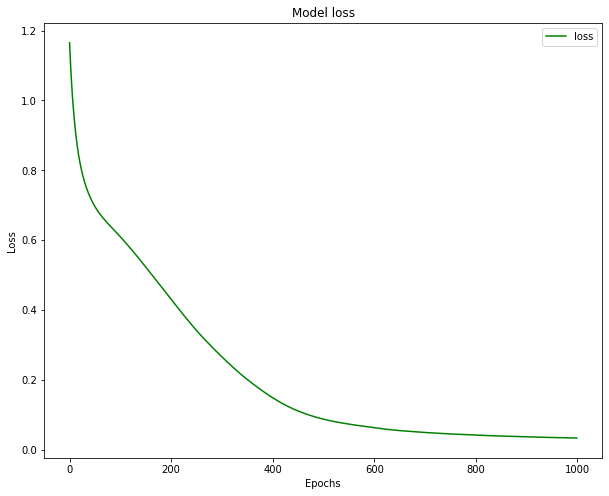

In [51]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'] ,'g', label='loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

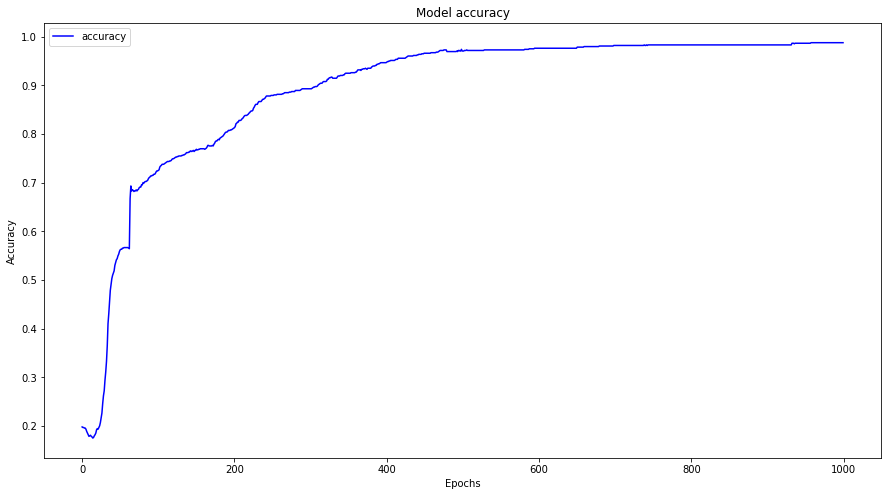

In [52]:
plt.figure(figsize = (15,8))
plt.plot(history.history['accuracy'], 'b', label='accuracy')

plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Final Weights and bias 

In [53]:
for layer in model.layers:
    weights = layer.get_weights()

In [54]:
weights

[array([[-0.08623009, -0.44842187],
        [ 0.94137335, -1.093294  ],
        [-1.9437525 ,  0.3843769 ],
        [ 1.2778696 , -2.1199322 ]], dtype=float32),
 array([-0.893957 , -0.2536908], dtype=float32)]

In [55]:
weights[0]

array([[-0.08623009, -0.44842187],
       [ 0.94137335, -1.093294  ],
       [-1.9437525 ,  0.3843769 ],
       [ 1.2778696 , -2.1199322 ]], dtype=float32)

In [56]:
weights[1]

array([-0.893957 , -0.2536908], dtype=float32)